In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Нажмите чтобы отобразить/скрыть код."></form>''')

### Графический метод решения игр типа 2$\times$n и m$\times$2

Рассмотрим игру типа 2$\times$n с платежной матрицей
\begin{equation*}
        C=\left( 
        \begin{array}{cccc}
            a_{11} & a_{12} & \ldots & a_{1n}\\
            a_{21} & a_{22} & \ldots & a_{2n}
        \end{array}
        \right)
    \end{equation*}
    
и проведем через точку (1; 0) координатной плоскости Oxy прямую l, перпендикулярную оси абсцисс. После этого для каждой из стратегий $B_i$ (i=${\overline{1,n}}$) проведем прямую $(b_i): y=a_{1i}+(a_{2i}-a_{1i})x$, соединяющую точку (0;$a_{1i}$) на оси Оу с точкой (0;$a_{2i}$) на прямой l. Ось Оу отвечает за стратегию $A_1$, а прямая l - за стратегию $A_2$.
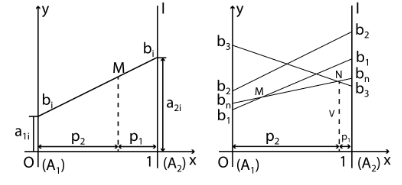

&#8195;&#8195; Ломаная $b_1MNb_3$, отмеченная на чертеже жирной линией, позволяет определить минимальный выигрыш игрока А при любом поведении игрока В. Точка N, в которой эта ломаная достигает максимума, определяет решение и цену игры. Ордината точки N равна цене игры V, а ее абсцисса $p_2$ - частоте применения стратегии $A_1$ в оптимальной смешанной стратегии игрока А.
    
&#8195;&#8195; Далее непосредственно по чертежу находим пару "полезных" стратегий игрока В, пересекающихся в точке N (если в точке N пересекается более двух стратегий, то выберем любые две из них). Пусть это будут стратегии $B_i$ и $B_j$. Поскольку выигрыш игрока А, если он придерживается оптимальной стратегии, не зависит от того, в каких пропорциях игрок В применяет эти стратегии, то неизвестные $p_1$, $p_2$, V определяются из системы уравнений:
        \begin{equation*}
        \left\{\begin{matrix}
            a_{1i}p_1+a_{2i}p_2=V, \\ 
            a_{1j}p_1+a_{2j}p_2=V, \\
            p_1+p_2=1. 
        \end{matrix}\right.
        \end{equation*}
        
 Частоты $q_1$, $q_2$ в оптимальной стратегии
        \begin{equation*}
        S_B=\left( 
        \begin{array}{ccccccc}
            0 & \ldots & B_i & \ldots & B_j & \ldots & 0\\
            0 & \ldots & q_i & \ldots & q_j & \ldots & 0
        \end{array}
        \right)
    \end{equation*}

игрока В определяются из соотношения:
    $a_{1i}q_i+a_{1j}(1-q_i)=V$; ($q_j=1-q_i$).


#### Теперь вы можете посмотреть решение матричной игры 2x2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
from matplotlib.animation import FuncAnimation
import ipywidgets as widgets
from ipywidgets import interactive
from IPython.display import HTML
from sympy import Line, Point, Segment
import matplotlib.ticker as ticker

%matplotlib notebook


print("Введите матрицу 2x2:")
n=2
a = [[int(j) for j  in input().split()] for i in range(n)]

mat = np.array(a)

min_cols = np.amin(mat, axis = 0)
max_rows = np.amax(mat, axis = 1)

sed_point1 = np.amin(max_rows, axis = 0)
sed_point2 = np.amax(min_cols, axis = 0)

if (sed_point1 == sed_point2):
    print("Cедловая точка существует, цена игры: " + str(sed_point1))

Введите матрицу 2x2:
1 2
2 1


#### Шаг №1. Проверка седловой точки.

&#8195;&#8195; Сначала необходимо определить, решается ли данная игра в чистых стратегиях, то есть существует ли седловая точка или нет. Если таковая точка существует, то задача решена и графическое решение не требуется. Как определить седловую точку было показано при решении матричной игры аналитическим методом.

In [3]:
if (sed_point1 == sed_point2):
    print("Cедловая точка существует, цена игры: " + str(sed_point1))

#### Шаг №2. Построение графика функций.

&#8195;&#8195; Далее необходимо нанести графики каждой функции на координатную плоскость. Выделяем точку пересчения этих прямых, в дальнейших вычислениях эта точка понадобится.

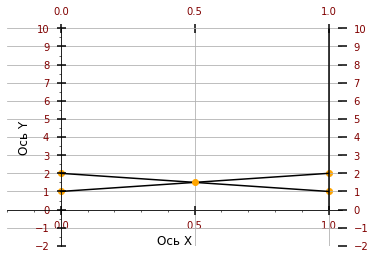

In [4]:
if (sed_point1 != sed_point2):
    fig, ax = plt.subplots()
    plt.axis([-0.2, 1.05, -2, 10])
    ax.vlines(1, 0, 10)
    lol = []
    plt.xlabel('Ось X', fontsize=12, color='black')
    plt.ylabel('Ось Y', fontsize=12, color='black')
    plt.grid(True)

    ax = plt.gca()
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')

    ax.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.1))

    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.5))

    ax.tick_params(axis = 'both',    #  Применяем параметры к обеим осям
                   which = 'major',    #  Применяем параметры к основным делениям
                   direction = 'inout',    #  Рисуем деления внутри и снаружи графика
                   length = 9,    #  Длинна делений
                   width = 1.5,     #  Ширина делений
                   color = 'black',    #  Цвет делений
                   pad = 7,    #  Расстояние между черточкой и ее подписью
                   labelsize = 10,    #  Размер подписи
                   labelcolor = 'maroon',    #  Цвет подписи
                   bottom = True,    #  Рисуем метки снизу
                   top = True,    #   сверху
                   left = True,    #  слева
                   right = True,    #  и справа
                   labelbottom = True,    #  Рисуем подписи снизу
                   labeltop = True,    #  сверху
                   labelleft = True,    #  слева
                   labelright = True,    #  и справа
                   labelrotation = 0)    #  Поворот подписей

    x1 = [0,1]
    y1 = [mat[1][1],mat[0][1]]

    x2 = [0,1]
    y2 = [mat[1][0],mat[0][0]]

    p1, p2, p3, p4 = (Point(x1[0], y1[0]), Point(x1[1], y1[1]),
                      Point(x2[0], y2[0]), Point(x2[1], y2[1]))

    line1 = Line(p1, p2)
    line2 = Line(p3, p4)

    ax.plot(x1,y1, color = 'black')
    ax.plot(x2,y2, color = 'black')

    ax.scatter(1, mat[0][0], color='orange', marker='o')
    ax.scatter(1, mat[0][1], color='orange', marker='o')
    ax.scatter(0, mat[1][0], color='orange', marker='o')
    ax.scatter(0, mat[1][1], color='orange', marker='o')

    intersect = line1.intersection(line2)
    if (intersect != []):
        inter_point = intersect[0]
        lol = list(inter_point)
        ax.plot(lol[0],lol[1], marker = 'o', color='orange')

    lol1 = np.array(lol)
    sed_point1

#### Шаг №3. Определение смешанных стратегий игроков.

&#8195;&#8195; Оптимальную стратегию определяет точка N, то есть минимальный выигрыш, показанный на графике ниже, достигает максимума. Так мы определим лучшую стратегию первого игрока, а для того чтобы определить стратегию второго игрока необходимо взять оба отрезка, разположенные выше точки пересечения.

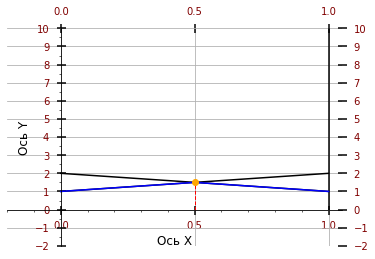

In [5]:
if (sed_point1 != sed_point2):
    y1_n = np.sort(y1, axis = 0)
    y2_n = np.sort(y2, axis = 0)

    fig, ax = plt.subplots()
    plt.axis([-0.2, 1.05, -2, 10])
    ax.vlines(1, 0, 10)
    plt.xlabel('Ось X', fontsize=12, color='black')
    plt.ylabel('Ось Y', fontsize=12, color='black')
    plt.grid(True)

    ax = plt.gca()
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')

    ax.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.1))

    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.5))

    ax.tick_params(axis = 'both',    #  Применяем параметры к обеим осям
                   which = 'major',    #  Применяем параметры к основным делениям
                   direction = 'inout',    #  Рисуем деления внутри и снаружи графика
                   length = 9,    #  Длинна делений
                   width = 1.5,     #  Ширина делений
                   color = 'black',    #  Цвет делений
                   pad = 7,    #  Расстояние между черточкой и ее подписью
                   labelsize = 10,    #  Размер подписи
                   labelcolor = 'maroon',    #  Цвет подписи
                   bottom = True,    #  Рисуем метки снизу
                   top = True,    #   сверху
                   left = True,    #  слева
                   right = True,    #  и справа
                   labelbottom = True,    #  Рисуем подписи снизу
                   labeltop = True,    #  сверху
                   labelleft = True,    #  слева
                   labelright = True,    #  и справа
                   labelrotation = 0)    #  Поворот подписей
    ax.plot(x1,y1, color = 'black')
    ax.plot(x2,y2, color = 'black')
    ax.plot([0,lol1[0]],[y1_n[0],lol1[1]], color = 'blue')
    ax.plot([1,lol1[0]],[y2_n[0],lol1[1]], color = 'blue')

    if (intersect != []):
        ax.plot(lol[0],lol[1], marker = 'o', color='orange')
        ax.vlines(lol[0], 0, lol[1], color = 'red', linewidth = 1, linestyle = '--',)
        
def toFixed(f: float, n=0):
    a, b = str(f).split('.')
    return '{}.{}{}'.format(a, b[:n], '0'*(n-len(b)))
        
        
def game2x2():
    
    p1 = (a[1][1] - a[1][0])/(a[0][0]+a[1][1] - a[1][0] - a[0][1])
    p2 = (a[0][0] - a[0][1])/(a[0][0]+a[1][1] - a[1][0] - a[0][1])
    
    q1 = (a[1][1] - a[0][1])/(a[0][0]+a[1][1] - a[1][0] - a[0][1])
    q2 = (a[0][0] - a[1][0])/(a[0][0]+a[1][1] - a[1][0] - a[0][1])
    
    y = (a[0][0]*a[1][1] - a[0][1]*a[1][0])/(a[0][0]+a[1][1] - a[1][0] - a[0][1])
    
    print("Ответ: y = "+ str(toFixed(y, 2)))
    print("Смешанные стратегии игрока №1: P(" + str(toFixed(p1, 1)) + "," + str(toFixed(p2, 1)) + ")")
    print("Смешанные стратегии игрока №2: Q(" + str(toFixed(q1, 1)) + "," + str(toFixed(q2, 1)) + ")")

#### Шаг №4. Решить систему уравнений.

&#8195;&#8195; На последнем этапе решения необходимо решить систему уравнений и получить смешанные стратегии обоих игроков, а также цену игры.

In [6]:
game2x2()

Ответ: y = 1.50
Смешанные стратегии игрока №1: P(0.5,0.5)
Смешанные стратегии игрока №2: Q(0.5,0.5)
